In [1]:
import sys
# import pyccl as ccl
import pickle
import camb
sys.path.insert(0,'../skylens/')
# from importlib import reload

In [2]:
from distributed import LocalCluster
from dask.distributed import Client  # we already had this above
#http://distributed.readthedocs.io/en/latest/_modules/distributed/worker.html
c=LocalCluster(n_workers=1,processes=False,memory_limit='25gb',threads_per_worker=4,memory_spill_fraction=.99,
               memory_monitor_interval='2000ms')
client=Client(c)

In [3]:
len(client.scheduler_info()['workers'])

1

In [4]:
from skylens import *
from survey_utils import *

In [5]:
#only for python3
import importlib
reload=importlib.reload

In [6]:
zs=lsst_source_tomo_bins()
corr_ll=('shear', 'shear')

ns0:  27.0


In [7]:
wigner_files={}
# wigner_files[0]= '/Users/Deep/dask_temp/dask_wig3j_l3500_w2100_0_reorder.zarr'
# wigner_files[2]= '/Users/Deep/dask_temp/dask_wig3j_l3500_w2100_2_reorder.zarr'
wig_home='/verafs/scratch/phy200040p/sukhdeep/physics2/skylens/temp/'
wigner_files[0]= wig_home+'dask_wig3j_l3500_w2100_0_reorder.zarr'
wigner_files[2]= wig_home+'/dask_wig3j_l3500_w2100_2_reorder.zarr'


# Power Spectrum covariance

In [8]:
#setup parameters
lmax_cl=200
lmin_cl=2
l0=np.arange(lmin_cl,lmax_cl)

lmin_cl_Bins=lmin_cl+10
lmax_cl_Bins=lmax_cl-10
Nl_bins=20
l_bins=np.int64(np.logspace(np.log10(lmin_cl_Bins),np.log10(lmax_cl_Bins),Nl_bins))
lb=np.sqrt(l_bins[1:]*l_bins[:-1])

l=np.unique(np.int64(np.logspace(np.log10(lmin_cl),np.log10(lmax_cl),Nl_bins*20))) #if we want to use fewer ell

do_cov=True
bin_cl=True

SSV_cov=True
tidal_SSV_cov=False
Tri_cov=True

bin_xi=True
theta_bins=np.logspace(np.log10(1./60),1,20)

##  Test with 1 redshift bin

In [9]:
nside=32
window_lmax=nside

In [10]:
use_window=False
do_cov=True

In [29]:
z0=1 #1087
# zs_bin1=source_tomo_bins(zp=[z0],p_zp=np.array([1]),ns=30,use_window=use_window,nside=nside)
zs_bin1=lsst_source_tomo_bins(nbins=2,use_window=use_window,nside=nside)

/verafs/home/sukhdeep/.local/lib/python3.8/site-packages/skylens-0.1-py3.8.egg/skylens/angular_power_spectra.py:26: RuntimeWarning: divide by zero encountered in true_divide
/verafs/home/sukhdeep/.local/lib/python3.8/site-packages/healpy-1.14.0-py3.8-linux-x86_64.egg/healpy/sphtfunc.py:433: FutureChangeWarning: The order of the input cl's will change in a future release.
Use new=True keyword to start using the new order.
See documentation of healpy.synalm.
  warnings.warn(
/verafs/home/sukhdeep/.local/lib/python3.8/site-packages/healpy-1.14.0-py3.8-linux-x86_64.egg/healpy/sphtfunc.py:822: UserWarning: Sigma is 0.000000 arcmin (0.000000 rad) 
  warnings.warn(
/verafs/home/sukhdeep/.local/lib/python3.8/site-packages/healpy-1.14.0-py3.8-linux-x86_64.egg/healpy/sphtfunc.py:827: UserWarning: -> fwhm is 0.000000 arcmin
  warnings.warn(
../skylens/survey_utils.py:127: RuntimeWarning: invalid value encountered in sqrt
  cl_map_noise=np.sqrt(cl_map)


In [12]:
use_binned_l=False

In [13]:
store_win=False

In [14]:
SSV_cov=False
bin_cl=True
do_cov=True
Tri_cov=False

In [15]:
do_pseudo_cl=False
do_xi=True

In [16]:
window_lmax

32

In [27]:
do_cov=True
use_window=True

In [30]:
#use all ell
kappa0=Skylens(zs_bins=zs_bin1,do_cov=do_cov,bin_cl=bin_cl,l_bins=l_bins,l=l0, zg_bins=None,
                                       use_window=use_window,Tri_cov=Tri_cov,
                                       use_binned_l=use_binned_l,wigner_files=wigner_files,
                                       SSV_cov=SSV_cov,tidal_SSV_cov=tidal_SSV_cov,f_sky=0.35,
                                       store_win=store_win,window_lmax=window_lmax,
                                       sparse_cov=True
                                       )

/verafs/home/sukhdeep/.local/lib/python3.8/site-packages/skylens-0.1-py3.8.egg/skylens/window_utils.py:297: RuntimeWarning: invalid value encountered in sqrt
  map1=np.sqrt(z_bin1['window'])


In [31]:
%time cl0G=kappa0.cl_tomo() 

In [ ]:
kappa0.l_bins

02:03:09 DEBUG:run ['dot', '-Tpng']


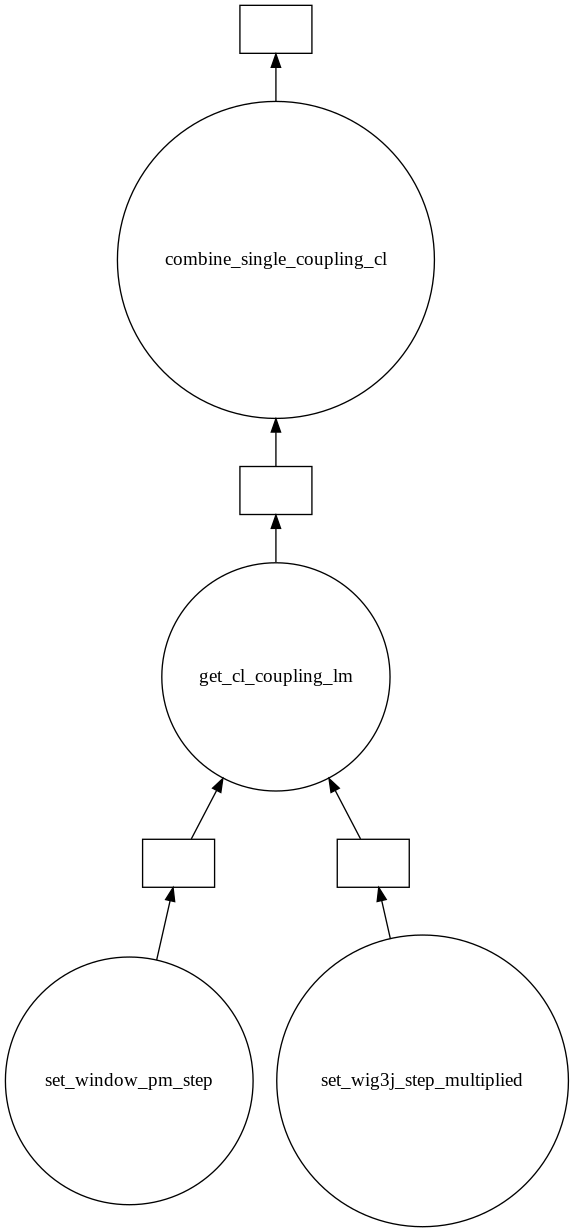

In [32]:
dask.visualize(kappa0.Win['cl'][corr_ll][(1,1)])

In [22]:
%time cl0G=kappa0.cl_tomo() 

In [ ]:
cl0G['cov'].keys()

In [25]:
cl0G['cov']

{}

02:03:46 DEBUG:run ['dot', '-Tpng']


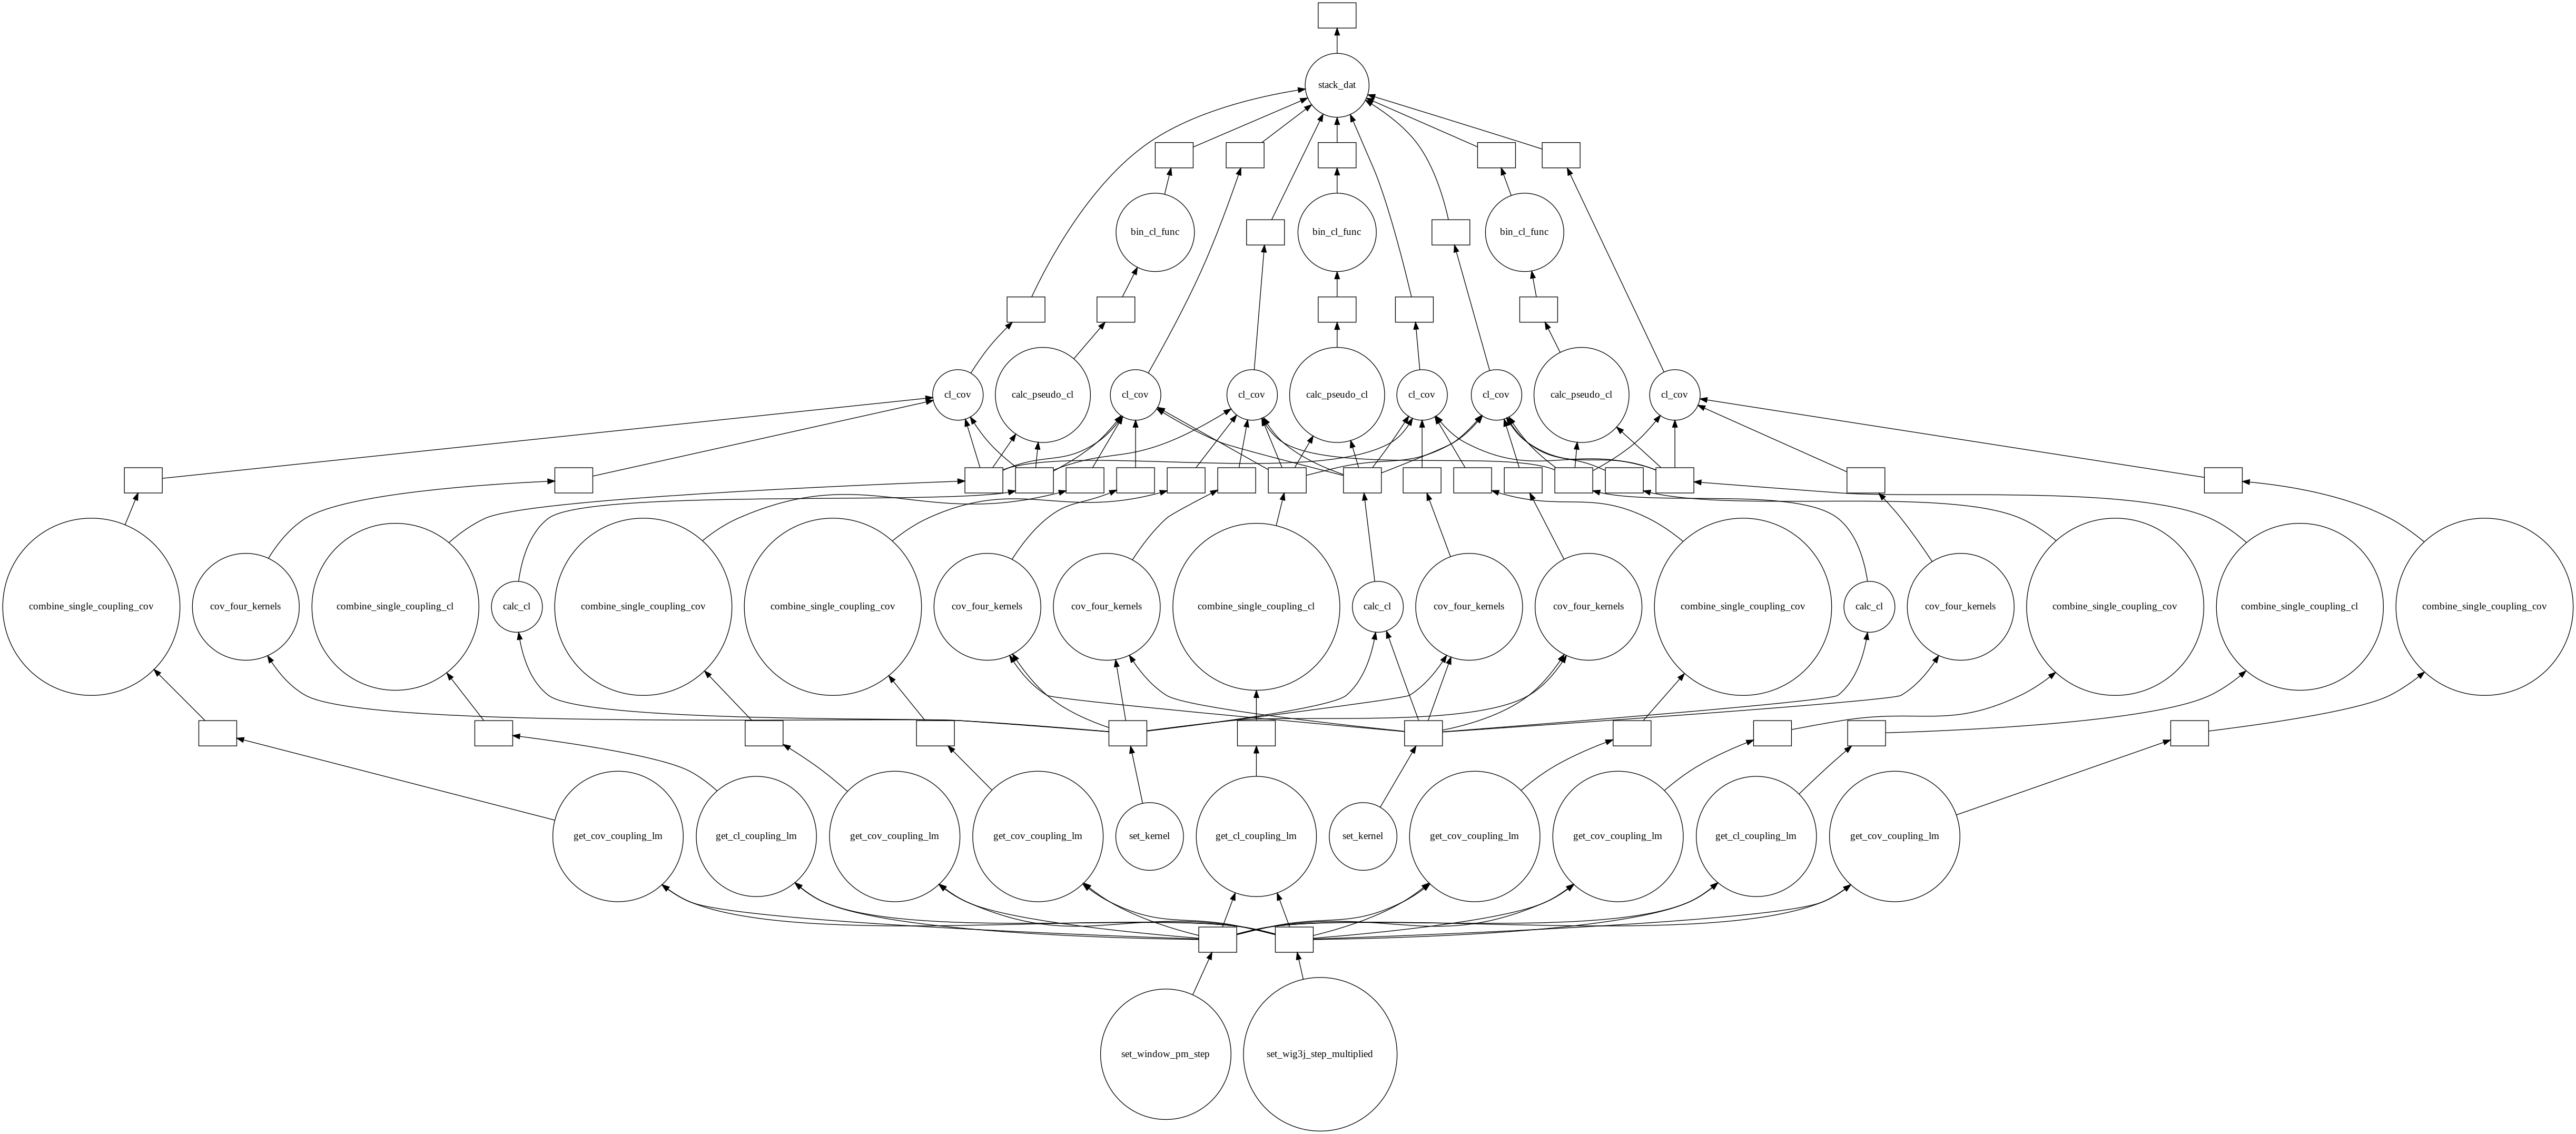

In [35]:
dask.visualize(cl0G['stack'])

02:04:23 DEBUG:run ['dot', '-Tpng']


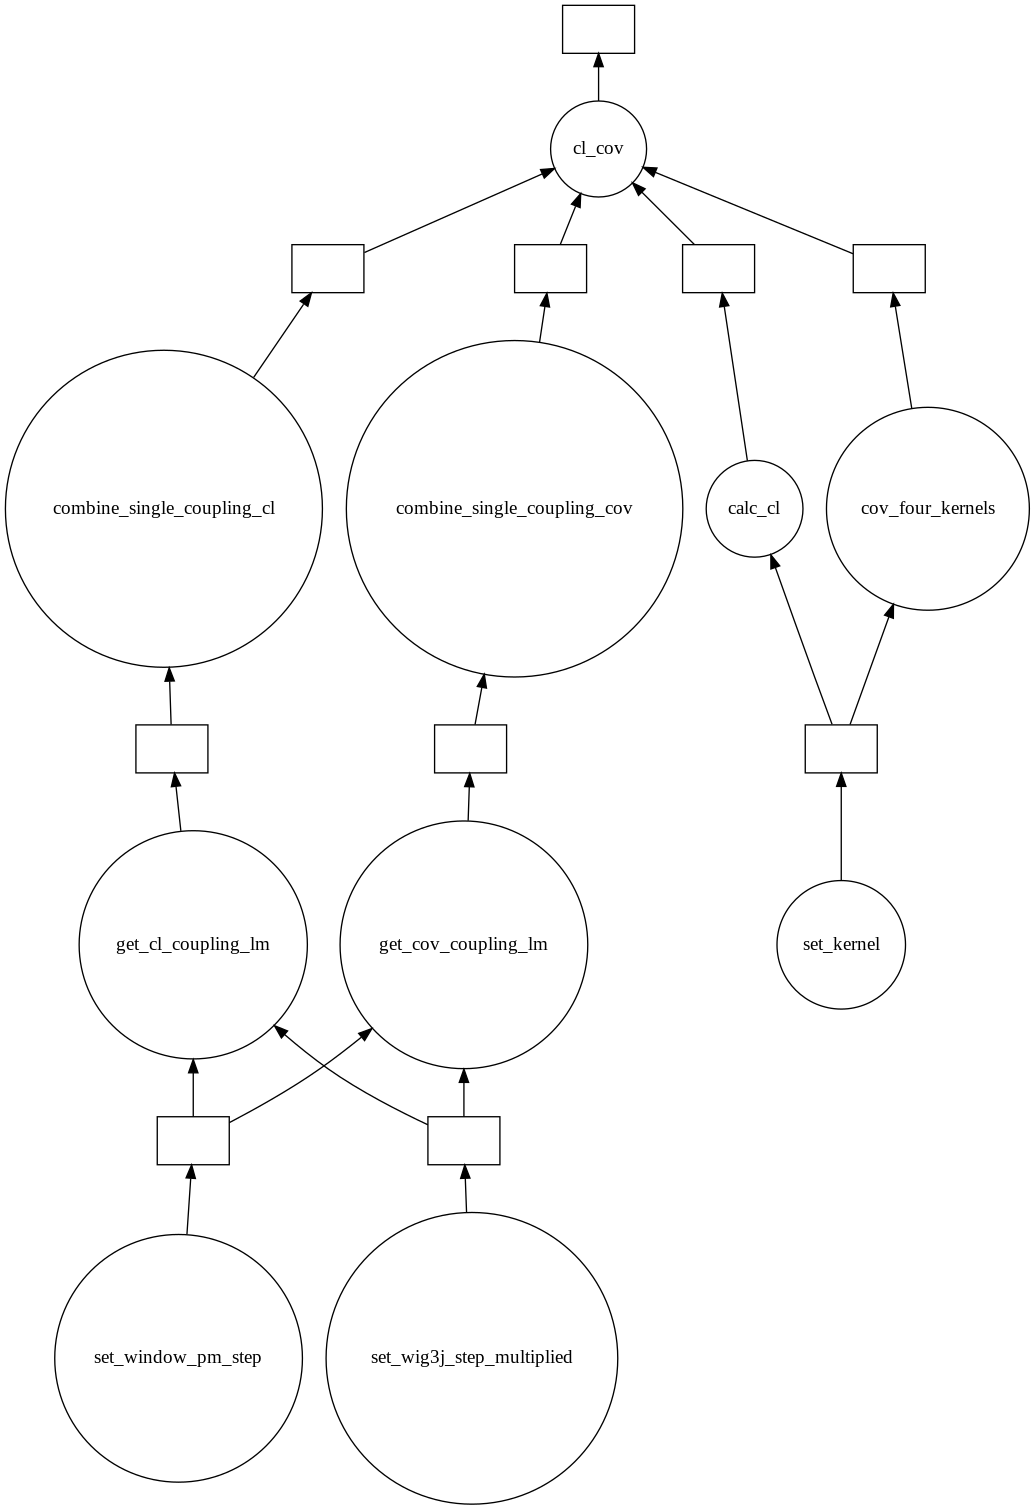

In [36]:
dask.visualize(cl0G['cov'][corr_ll+corr_ll][(0,0,0,0)])

In [ ]:
cl0G['stack'].compute()

In [ ]:
crash

In [ ]:
do_xi=True
bin_xi=True
bin_cl=True
th_min=2.5/60
th_max=250./60
n_th_bins=20
th_bins=np.logspace(np.log10(th_min),np.log10(th_max),n_th_bins+1)
th=np.logspace(np.log10(th_min),np.log10(th_max),n_th_bins*40)
thb=np.sqrt(th_bins[1:]*th_bins[:-1])

#Hankel Transform setup
WT_kwargs={'l':l0,'theta':th,'s1_s2':[(2,2),(2,-2),(0,0)]}
WT=wigner_transform(**WT_kwargs)

In [ ]:
kappa_xi0=Skylens(zs_bins=zs_bin1,do_cov=do_cov,bin_cl=bin_cl,l_bins=l_bins,l=l0, zg_bins=None,
                       use_window=use_window,Tri_cov=Tri_cov,
                       wigner_files=wigner_files,
                       SSV_cov=SSV_cov,tidal_SSV_cov=tidal_SSV_cov,f_sky=0.35,
                       store_win=store_win,window_lmax=window_lmax,
                      do_xi=do_xi,bin_xi=bin_xi,theta_bins=th_bins,WT=WT,
                      use_binned_l=False,use_binned_theta=False,
                      nz_PS=10,do_pseudo_cl=False,xi_win_approx=True)

In [ ]:
dask.visualize(kappa_xi0.Win.Win_cov)

In [ ]:
%time cl0G=kappa0.cl_tomo() 

In [ ]:
do_cov

In [ ]:
bi=(0,0)
xx=cl0G['cov'][corr_ll+corr_ll][bi+bi].compute()

In [ ]:
xx

In [ ]:
kappa0.l.shape

In [ ]:
%time cl0=cl0G['stack'].compute()

In [ ]:
cl0['cov']#.todense()

In [ ]:
# import wigner_transform 
# reload(wigner_transform)
# from wigner_transform import *

import binning
reload(binning)
from binning import *

In [ ]:
th

In [ ]:
WT.wig_d.keys()

In [ ]:
import skylens
reload(skylens)
from skylens import *

In [ ]:
use_binned_theta=True

In [ ]:
kappa_xi0=Skylens(zs_bins=zs_bin1,do_cov=do_cov,bin_cl=bin_cl,l_bins=l_bins,l=l0, zg_bins=None,
                                       use_window=use_window,Tri_cov=Tri_cov,
                                       wigner_files=wigner_files,
                                       SSV_cov=SSV_cov,tidal_SSV_cov=tidal_SSV_cov,f_sky=0.35,
                                       store_win=store_win,window_lmax=window_lmax,
                                      do_xi=do_xi,bin_xi=bin_xi,theta_bins=th_bins,WT=WT,
                                      use_binned_l=False,use_binned_theta=False,
                                      nz_PS=10
                                       )

In [ ]:
%time xiHG0=kappa_xi0.xi_tomo()
%time xiH0=xiHG0['stack'].compute()

In [ ]:
kappa_xib=Skylens(zs_bins=zs_bin1,do_cov=do_cov,bin_cl=bin_cl,l_bins=l_bins,l=l0, zg_bins=None,
                                       use_window=use_window,Tri_cov=Tri_cov,
                                       wigner_files=wigner_files,
                                       SSV_cov=SSV_cov,tidal_SSV_cov=tidal_SSV_cov,f_sky=0.35,
                                       store_win=store_win,window_lmax=window_lmax,
                                      do_xi=do_xi,bin_xi=bin_xi,theta_bins=th_bins,WT=WT,
                                      use_binned_l=use_binned_l,use_binned_theta=use_binned_theta
                                       )

In [ ]:
%time xiHG_b=kappa_xib.xi_tomo()

In [ ]:
%time xiH_b=xiHG_b['stack'].compute()

In [ ]:
kappa_xi0.WT.wig_d.keys(),WT.wig_d.keys()

In [ ]:
%time xiHG0=kappa_xi0.xi_tomo()
%time xiH0=xiHG0['stack'].compute()

In [ ]:
xiH0['xi']

In [ ]:
xiH_b['xi']